<h1>Forbes Billionaires 2021 Dataset Visualization</h1>

According to wikipedia, the World's Billionaires is an annual ranking by documented net worth of the wealthiest billionaires in the world, compiled and published in March annually by the American business magazine Forbes. The list was first published in March 1987. The total net worth of each individual on the list is estimated and is cited in United States dollars, based on their documented assets and accounting for debt and other factors. Royalty and dictators whose wealth comes from their positions are excluded from these lists. This ranking is an index of the wealthiest documented individuals, excluding any ranking of those with wealth that is not able to be completely ascertained.

# Table of Contents

#### [1. Loading and Preparing Data](#section_one)
#### [2. Countries Having Most Billionaire](#section_two)
#### [3. Billioniares From Top Two Country **VS** Rest of the World](#section_three)
#### [4. Continent Based Billionaires List](#section_four)
#### [5. World Map by Forbes Billionaires List](#section_five)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
import plotly.graph_objs as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="section_one"></a>
# 1. Loading and Preparing Data

In [3]:
data = pd.read_csv("Billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [4]:
country_Billionaire_df = pd.DataFrame()

for country in data.Country.unique():
    df = data.groupby("Country").get_group(country)
    df2 = pd.DataFrame({"country":[country],"total_Billionaire":[len(df)]})
    country_Billionaire_df = country_Billionaire_df.append(df2, ignore_index=True)

country_Billionaire_df=country_Billionaire_df.sort_values("total_Billionaire", ascending=False)
data = country_Billionaire_df.set_index('country')

for country in data.index:
    code = [value.alpha_3 for value in pycountry.countries if (value.name==country)]
    if len(code)==0:
        data.at[country,"iso_alpha"]= None
        data.at[country,"Country Name"]= country
    else:
        data.at[country,"iso_alpha"]= code[0]
        data.at[country,"Country Name"]= country

data.head()

,total_Billionaire,iso_alpha,Country Name
country,,,
United States,724,USA,United States
China,626,CHN,China
India,140,IND,India
Germany,136,DEU,Germany
Russia,118,None,Russia


In [5]:
data.isnull().sum()

total_Billionaire    0
iso_alpha            8
Country Name         0
dtype: int64

The iso_alpha code is missing for 8 countries.

<a id="section_two"></a>
# 2. Countries Having Most Billionaire

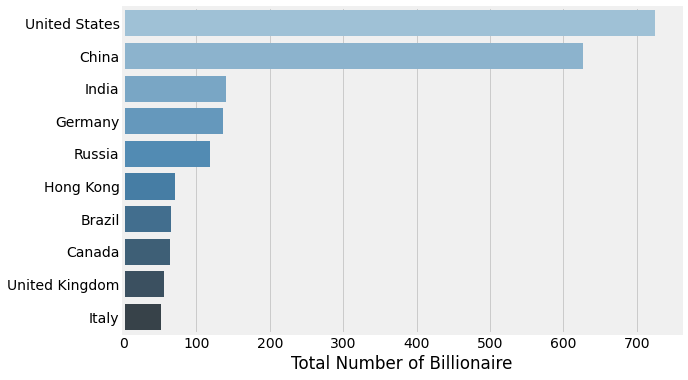

In [6]:
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(y="country", x="total_Billionaire",palette="Blues_d", data=country_Billionaire_df.iloc[:10])
plt.ylabel("")
plt.xlabel("Total Number of Billionaire")
plt.show()

#### United States have more than 700 Billioniares.

<a id="section_three"></a>
# 3.Billioniares From Top Two Country **VS** Rest of the World

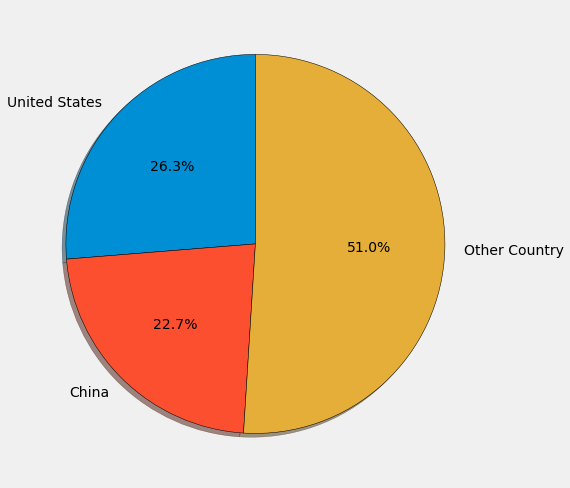

In [7]:
other = sum(country_Billionaire_df.total_Billionaire)-sum(country_Billionaire_df.iloc[:2].total_Billionaire)
number = list(country_Billionaire_df.iloc[:2].total_Billionaire)
number.append(other)


country = list(country_Billionaire_df.iloc[:2].country)
country.append("Other Country")


plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.pie(number, labels=country, shadow=True, startangle=90,autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.tight_layout()

### 49% Billioniare are from top two country United Stetes and China.

### 

<a id="section_four"></a>
# 4. Continent Based Billionaires List

In [8]:
def plot_Billionaire_Data(continent="world",title=""):
    fig = px.choropleth(data, locations="iso_alpha",
                        color="total_Billionaire",
                        hover_name="Country Name", # column to add to hover information
                        color_continuous_scale="Viridis",
                        color_continuous_midpoint= 300,
                        scope = str(continent))
    layout = go.Layout(
        title=go.layout.Title(
            text= f"<b>{title}</b>",
            x=0.5
        ),
        showlegend=False,
        font=dict(size=14),
        width = 750,
        height = 350,
        margin=dict(l=0,r=0,b=0,t=30)
    )

    fig.update_layout(layout)
    fig.show()

In [9]:
plot_Billionaire_Data(continent="asia",title="Asian Billionaires List")

In [10]:
plot_Billionaire_Data(continent="europe",title="European Billionaires List")

In [11]:
plot_Billionaire_Data(continent="africa",title="African Billionaires List")

In [12]:
plot_Billionaire_Data(continent="north america",title="North American Billionaires List")

In [13]:
plot_Billionaire_Data(continent="south america",title="South American Billionaires List")

<a id="section_five"></a>
# 5. World Map by Forbes Billionaires List

In [14]:
plot_Billionaire_Data(continent="world",title="Worldwide Billionaires")